In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
img = cv2.imread("C:\\Users\\CorteC\\Desktop\\ouss\\ouss pics\\Pins\\1a8fc1f6a432f3103725f3cedb10d6e7.jpg",cv2.IMREAD_GRAYSCALE )
cv2.imshow('ORIGINAL IMAGE ' , img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('original.jpg', img)

True

In [5]:
equalized_img = cv2.equalizeHist(img)
cv2.imshow('EQUALIZED IMAGE ' , equalized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('equalized.jpg', equalized_img)

True

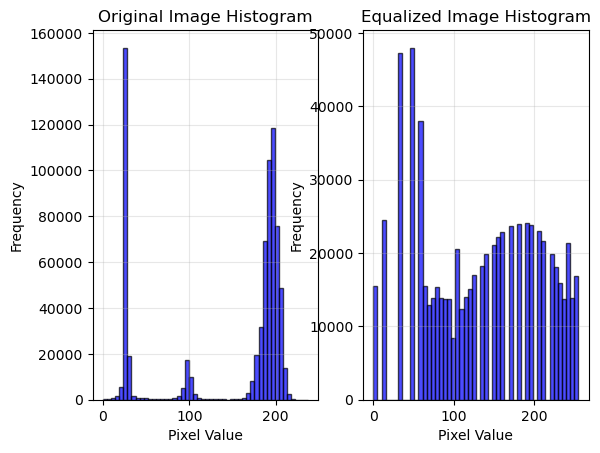

In [ ]:
plt.subplot(1 , 2 , 1)
plt.hist(img.ravel(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.subplot(1 , 2 , 2)
plt.hist(equalized_img.ravel(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

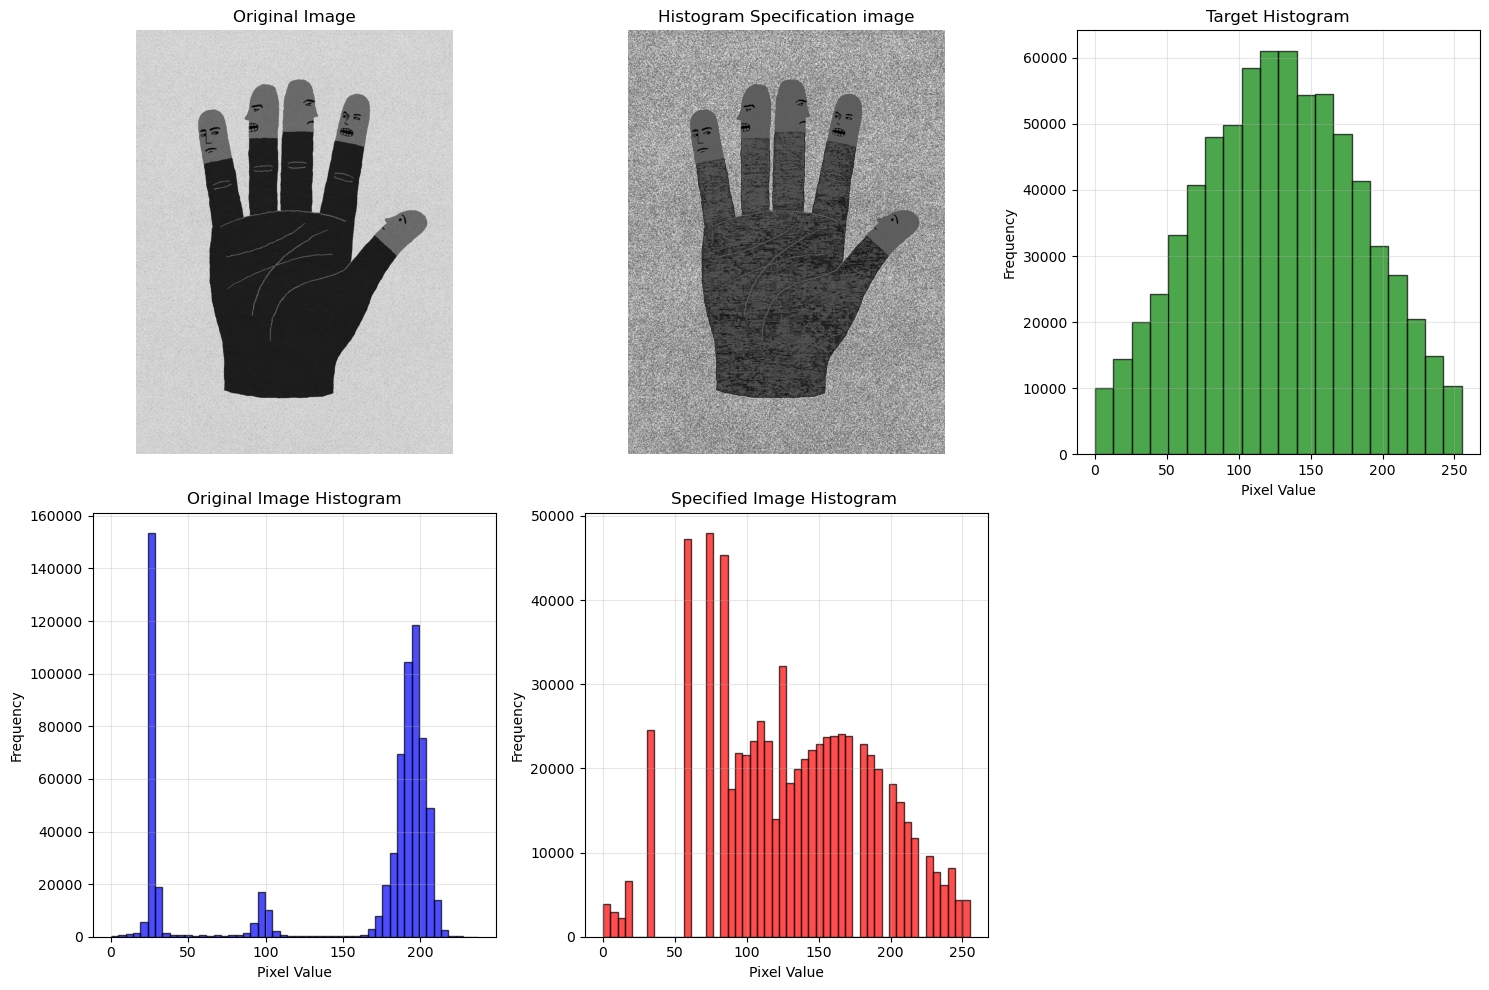

In [9]:
def manual_histogram_specification(img, target_hist):
    src_hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    src_cdf = src_hist.cumsum()
    src_cdf_normalized = src_cdf / src_cdf.max()
    
    target_cdf = target_hist.cumsum()
    target_cdf_normalized = target_cdf / target_cdf.max()
    
    
    mapping = np.zeros(256, dtype=np.uint8)
    
    for i in range(256):
        diff = np.abs(src_cdf_normalized[i] - target_cdf_normalized)
        mapping[i] = np.argmin(diff)
    
    specified_img = mapping[img]
    
    return specified_img

x = np.arange(256)
target_hist = np.exp(-0.5 * ((x - 128) / 64) ** 2)  
target_hist = target_hist / target_hist.sum()  

target_hist = (target_hist * img.size).astype(int)

matched_img = manual_histogram_specification(img, target_hist)

fig = plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(matched_img, cmap='gray')
plt.title('Histogram Specification image')
plt.axis('off')

plt.subplot(233)
plt.hist(np.arange(256), weights=target_hist, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Target Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


plt.subplot(234)
plt.hist(img.ravel(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(235)
plt.hist(matched_img.ravel(), bins=50, alpha=0.7, color='red', edgecolor='black')
plt.title('Specified Image Histogram ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()



In [16]:
cv2.imshow(',,,' , matched_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('specifid_img.jpg', matched_img)

True

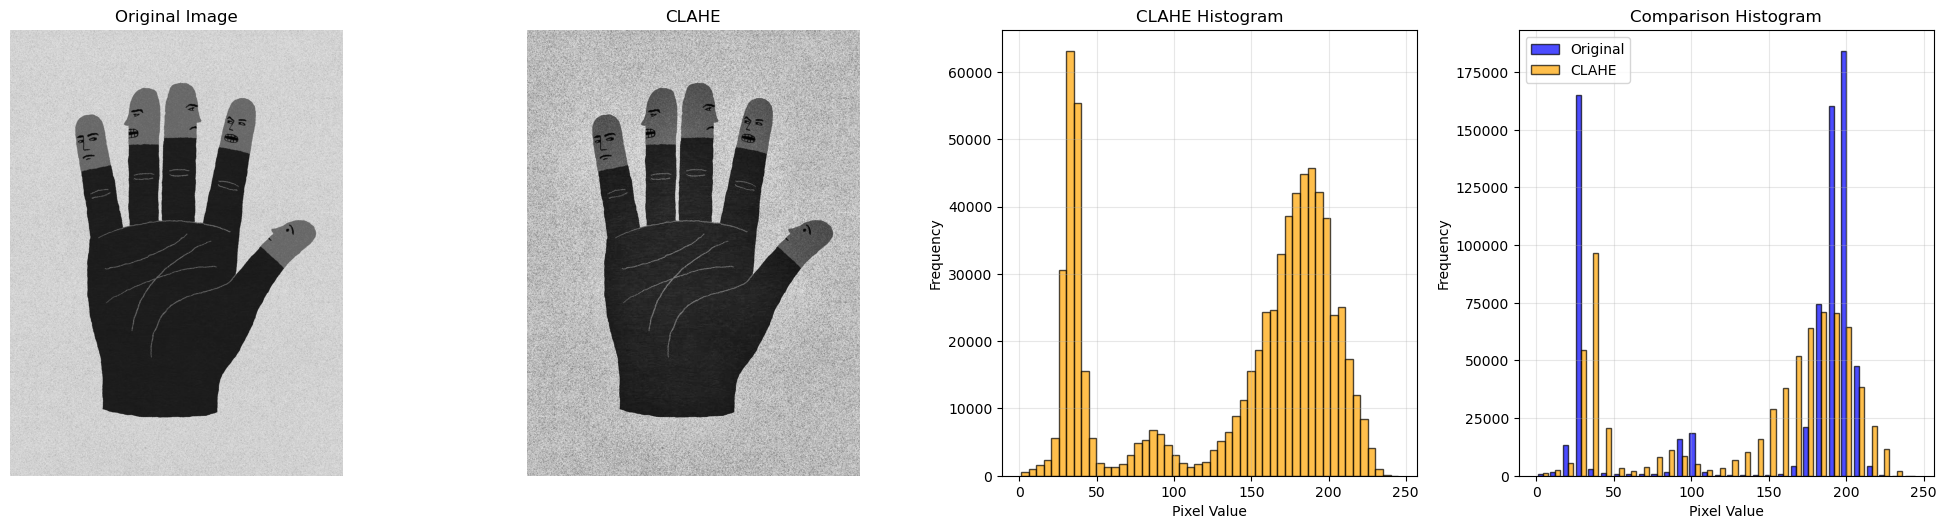

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

fig = plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(242)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.subplot(243)
plt.hist(clahe_img.ravel(), bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('CLAHE Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(244)
plt.hist([img.ravel(),  clahe_img.ravel()], bins=30, alpha=0.7,  label=['Original', 'CLAHE'], color=['blue',  'orange'], edgecolor='black')
plt.title('Comparison Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
cv2.imwrite('CLAHEIMAGE.jpg' , clahe_img)

True

In [2]:
def manual_ahe(img, kernel_size):
    h, w = img.shape
    pad = kernel_size // 2
    ahe_img = np.zeros_like(img)
    padded_img = np.pad(img, pad, mode='reflect')
    
    for i in range(h):
        for j in range(w):
            local_region = padded_img[i:i + kernel_size, j:j + kernel_size]
            hist, _ = np.histogram(local_region.flatten(), 256, [0, 256])
            cdf = hist.cumsum()
            cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            cdf_normalized = cdf_normalized.astype('uint8')
            ahe_img[i, j] = cdf_normalized[img[i, j]]
    
    return ahe_img

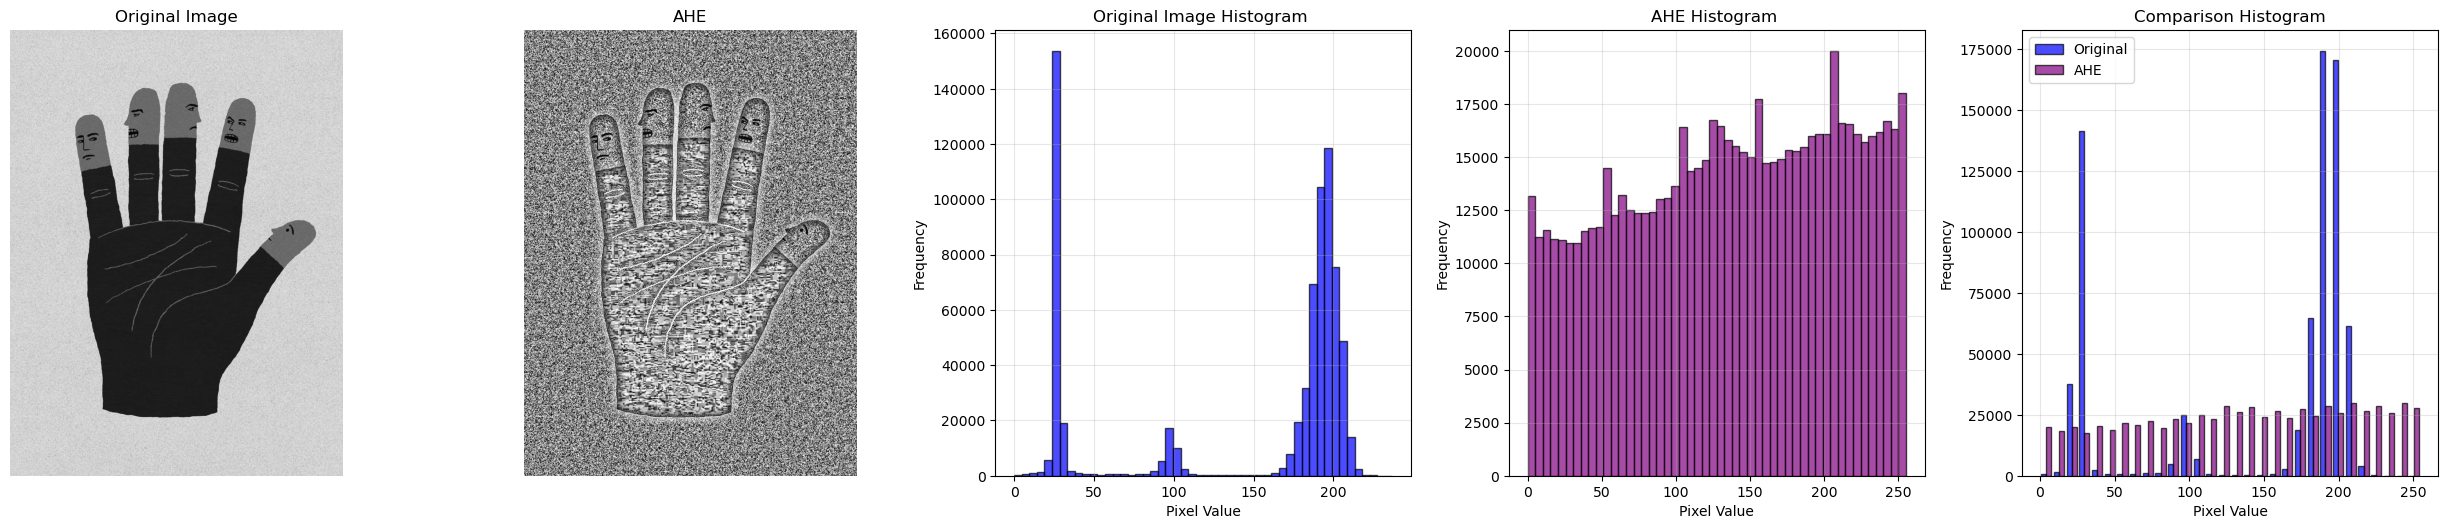

In [6]:
ahe_img = manual_ahe(img, kernel_size=32)

fig = plt.figure(figsize=(25, 10))

plt.subplot(251)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(252)
plt.imshow(ahe_img, cmap='gray')
plt.title('AHE')
plt.axis('off')


plt.subplot(253)
plt.hist(img.ravel(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Original Image Histogram ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


plt.subplot(254)
plt.hist(ahe_img.ravel(), bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('AHE Histogram ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(255)
plt.hist([img.ravel(), ahe_img.ravel()], bins=30, alpha=0.7,  label=['Original', 'AHE'],  color=['blue',  'purple'], edgecolor='black')
plt.title('Comparison Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
cv2.imwrite('AHEIMAGE.jpg' , ahe_img)

True